In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('movies_sentiment_data.csv')
df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [3]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
df['sentiment'] = np.where(df['sentiment']=='positive',1,0)

In [5]:
df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,1
1,I enjoyed the movie and the story immensely! I...,1
2,I had a hard time sitting through this. Every ...,0
3,It's hard to imagine that anyone could find th...,0
4,This is one military drama I like a lot! Tom B...,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.review,df.sentiment,test_size=0.2)

0

In [8]:
df.shape

(19000, 2)

In [9]:
X_train.shape

(15200,)

In [10]:
type(X_train)

pandas.core.series.Series

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
v = CountVectorizer()

In [13]:
X_train_cv = v.fit_transform(X_train)

In [14]:
X_train_cv[24].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X_train_cv.shape

(15200, 62626)

In [16]:
X_test_cv = v.transform(X_test)

In [17]:
X_test_cv.shape

(3800, 62626)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB()

In [20]:
model.fit(X_train_cv,y_train)

MultinomialNB()

In [30]:
y_pred = model.predict(X_test_cv)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1862
           1       0.86      0.81      0.83      1938

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800



In [35]:
from sklearn.metrics import confusion_matrix

In [39]:
report = confusion_matrix(y_test,y_pred)
print(report)

[[1614  248]
 [ 373 1565]]


In [45]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix Movies Sentimental ')

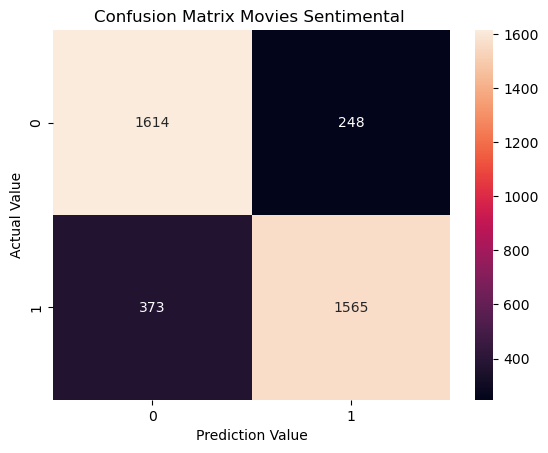

In [49]:
sn.heatmap(report,annot=True,fmt='d')
plt.xlabel('Prediction Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix Movies Sentimental ')

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf = Pipeline([
   ( 'vectorizer',CountVectorizer()),
    ('model',RandomForestClassifier(n_estimators=50))
])

In [60]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model', RandomForestClassifier(n_estimators=50))])

In [61]:
y_pred1 = clf.predict(X_test)

In [67]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1911
           1       0.81      0.83      0.82      1889

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



In [69]:
cr_report =confusion_matrix(y_pred1,y_test)
print(cr_report)

[[1540  371]
 [ 322 1567]]


<Axes: >

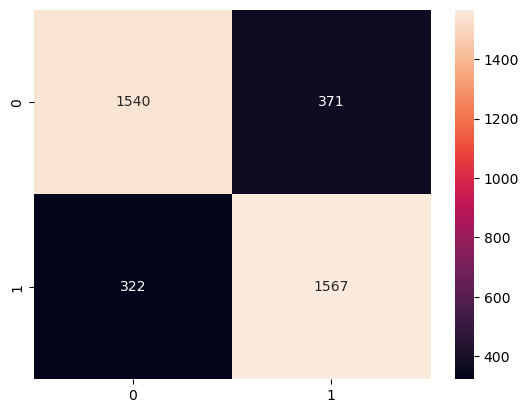

In [71]:
sn.heatmap(cr_report,annot=True,fmt='d')

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
clf2 = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('model',KNeighborsClassifier(n_neighbors=10))
])

In [74]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [76]:
y_pred2 = clf2.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1862
           1       0.65      0.63      0.64      1938

    accuracy                           0.64      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.64      0.64      0.64      3800



In [78]:
cm2 = confusion_matrix(y_test,y_pred2)

<Axes: >

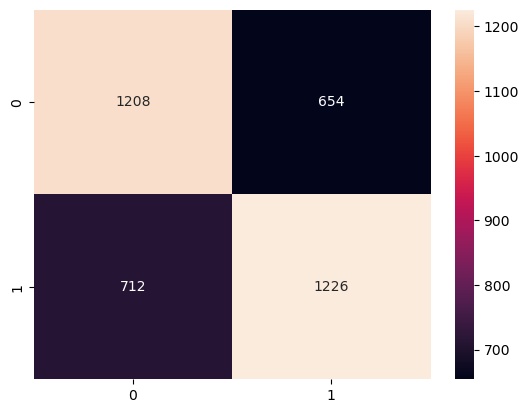

In [79]:
sn.heatmap(cm2,annot=True,fmt='d')